<a href="https://colab.research.google.com/github/MajidrNEO1879/LA_ML-related/blob/main/supervised_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:


import os
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt



In [46]:
df = pd.read_csv('../content/sample_data/InsuranceData.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [47]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [49]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])

df['sex'] = df['sex'].astype(bool)
df['smoker'] = df['smoker'].astype(bool)


region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis = 1)
df.drop('region', axis = 1, inplace = True)
df.fillna(df.mean(), inplace=True)


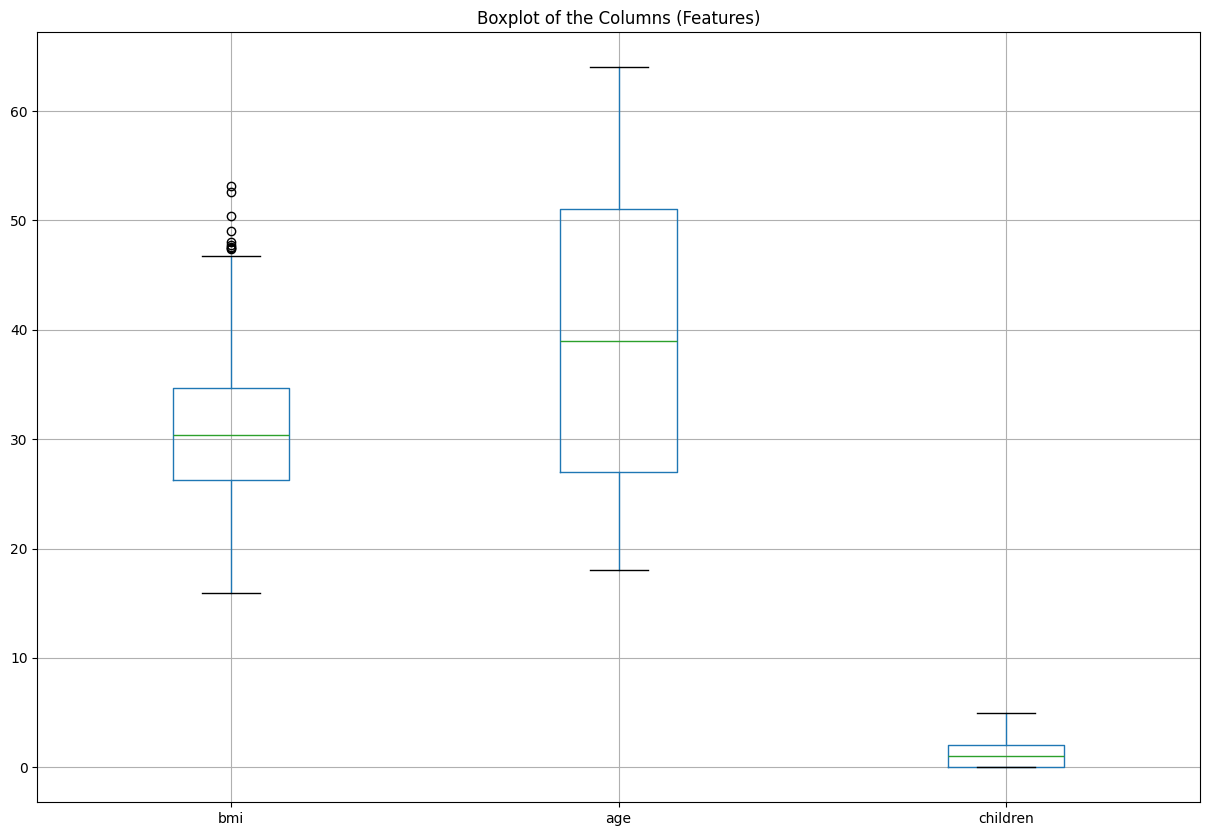

Total of 9 outliers detected. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [50]:
plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['bmi', 'age', 'children']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")

In [52]:
X = df.drop('charges', axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


Coefficients of the variables in the sklearn:  [ 3.74936794e+03 -2.63239821e+01  2.04098432e+03  4.14992320e+02
  9.50551814e+03  2.31460335e+02 -3.74782081e+01 -2.71997360e+00
 -1.89307616e+02]


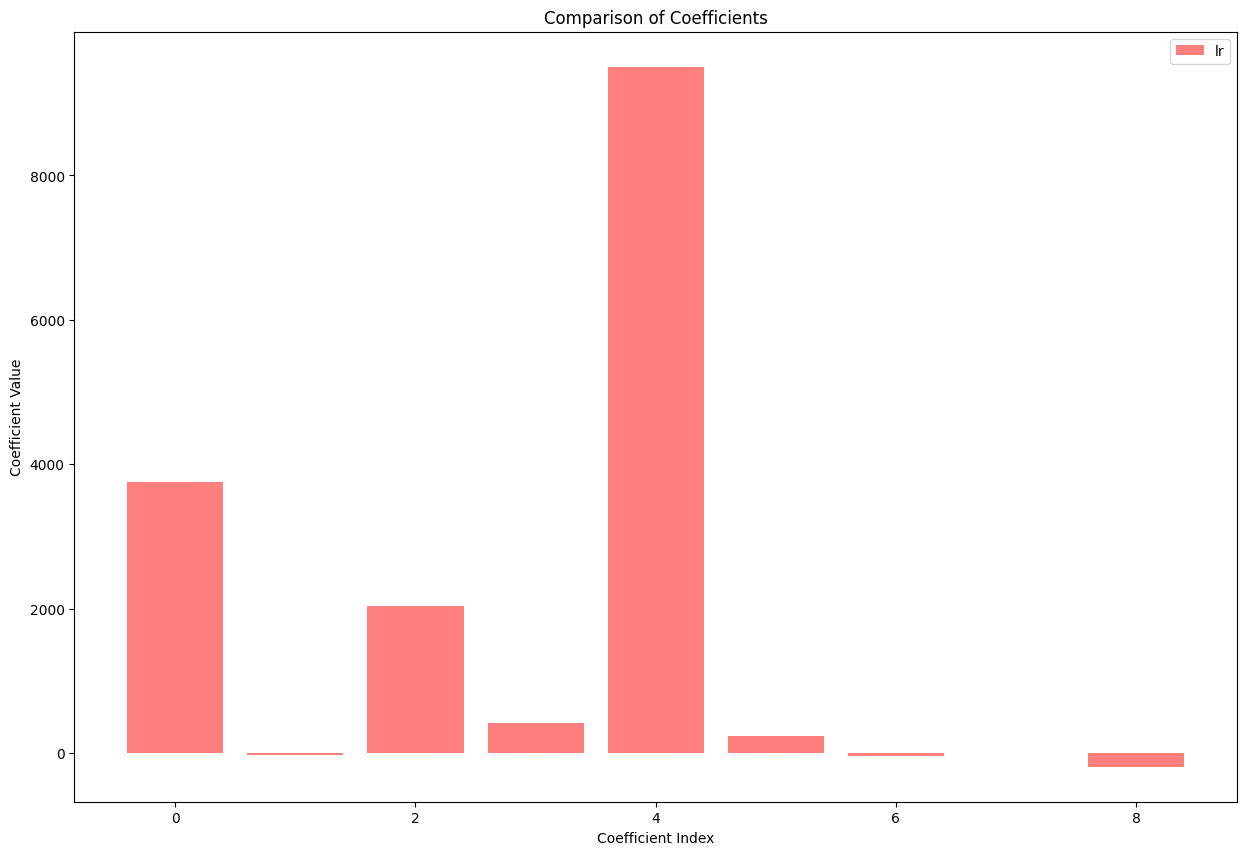

In [54]:
lr = LinearRegression()
lr.fit(x_train, y_train)
def visualize_coef(model, label, color):
    print("Coefficients of the variables in the sklearn: ", model.coef_)

    plt.figure(figsize=(15, 10))
    plt.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()

    plt.show()

visualize_coef(lr, "lr", "r")
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

Coefficients of the variables in the sklearn:  [3748.9651726   -25.73953801 2040.4983382   414.50616909 9504.97573859
  328.19943242   60.04713855   97.92233977  -91.32970496]


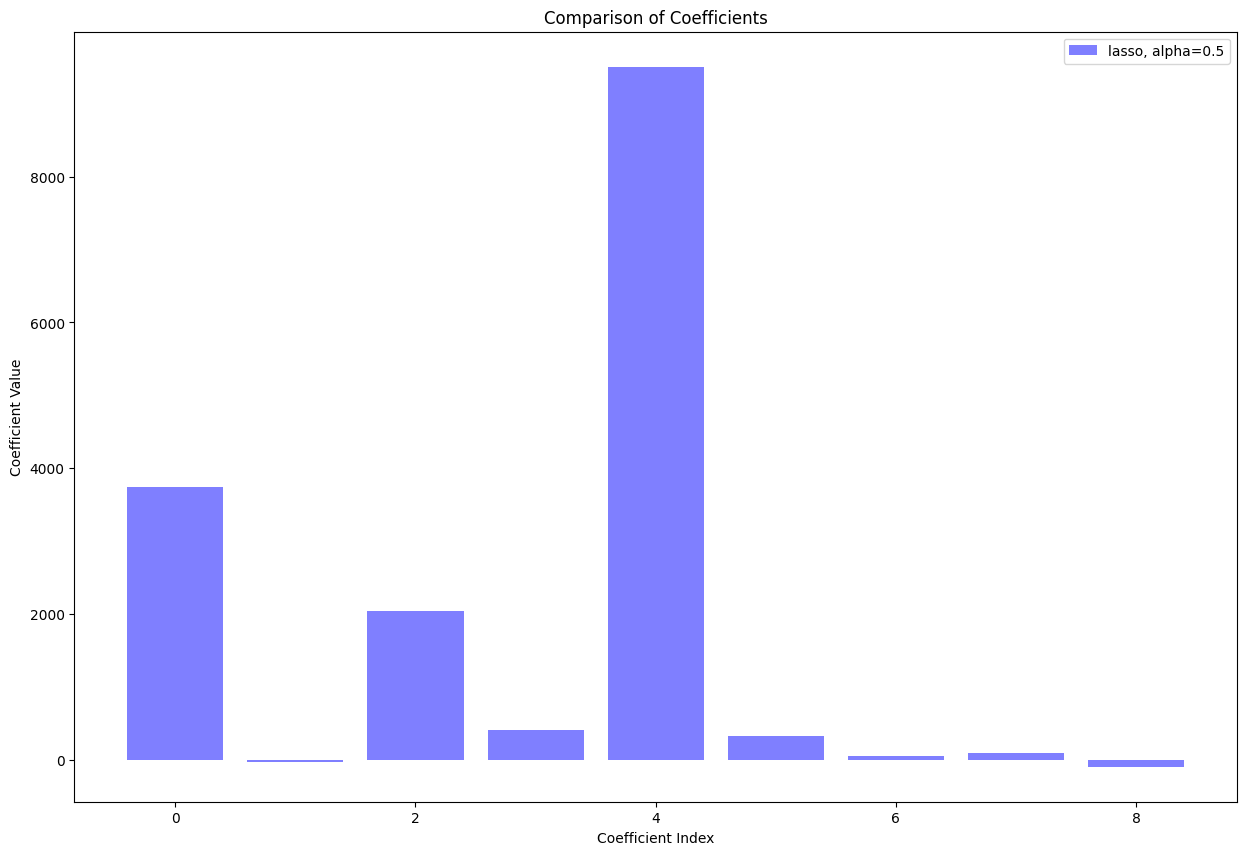

Coefficients of the variables in the sklearn:  [3749.28464765  -26.20805184 2040.88787465  414.89500587 9505.40993263
  330.24673981   62.19647454  100.08245458  -89.6452194 ]


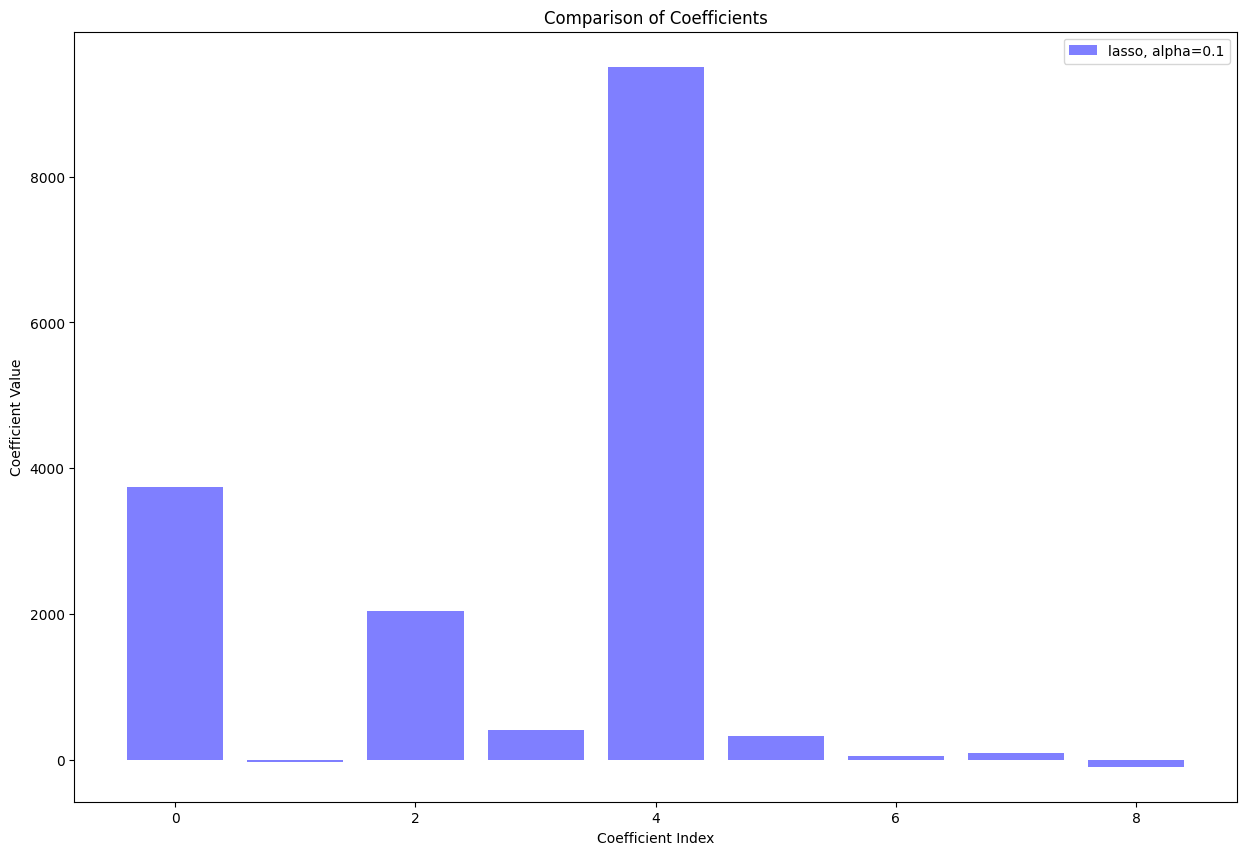

Coefficients of the variables in the sklearn:  [3747.65537524  -24.03524374 2039.23830239  412.93687025 9503.50270752
  265.80936234   -0.           33.78053219 -151.42463651]


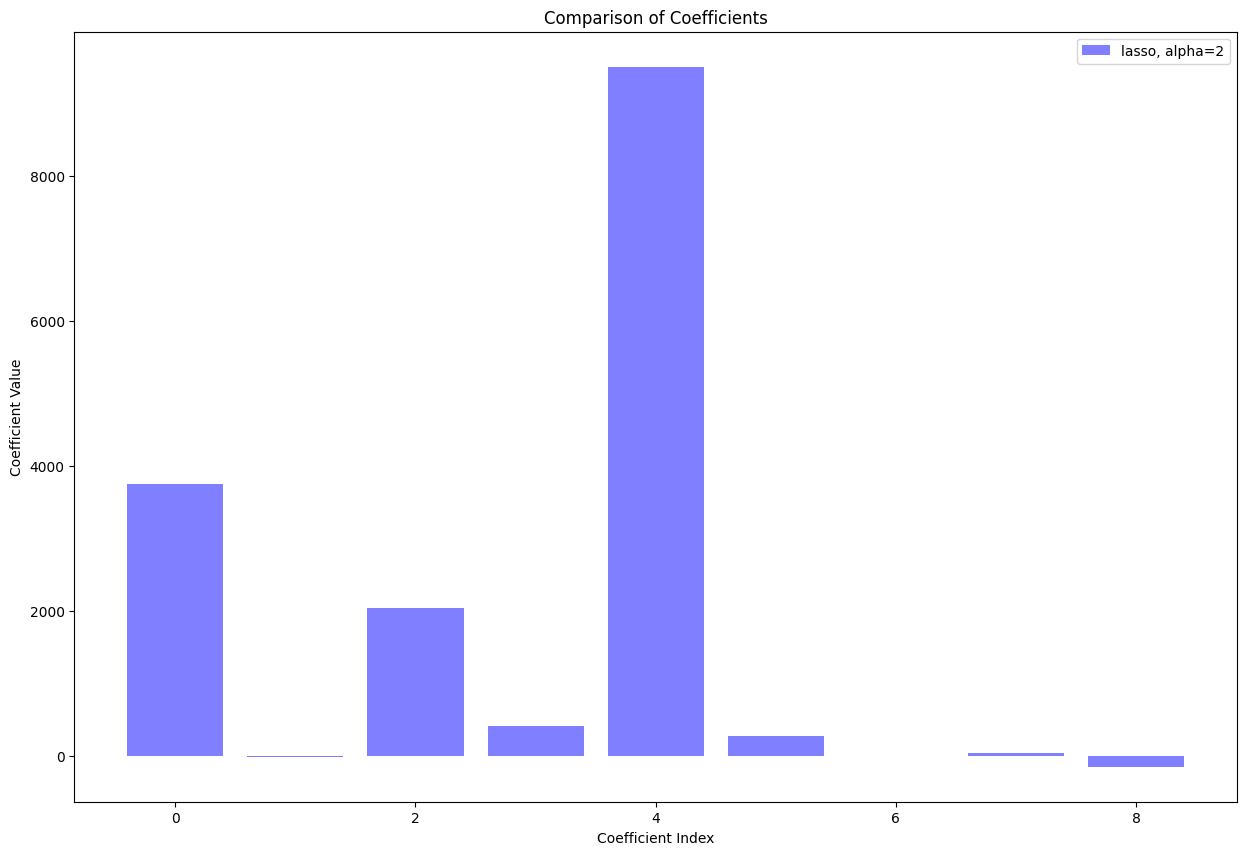

In [56]:
lasso_lr = Lasso(alpha=0.5)
lasso_lr.fit(x_train, y_train)


lasso_lr_low_alpha = Lasso(alpha=0.1)
lasso_lr_low_alpha.fit(x_train, y_train)


lasso_lr_high_alpha = Lasso(alpha=2)
lasso_lr_high_alpha.fit(x_train, y_train)
visualize_coef(lasso_lr, "lasso, alpha=0.5", "b")
visualize_coef(lasso_lr_low_alpha, "lasso, alpha=0.1", "b")
visualize_coef(lasso_lr_high_alpha, "lasso, alpha=2", "b")

Coefficients of the variables in the sklearn:  [ 3.74763995e+03 -2.59370386e+01  2.04005513e+03  4.14948563e+02
  9.50094462e+03  2.31268792e+02 -3.77796259e+01 -2.25825214e+00
 -1.89292530e+02]


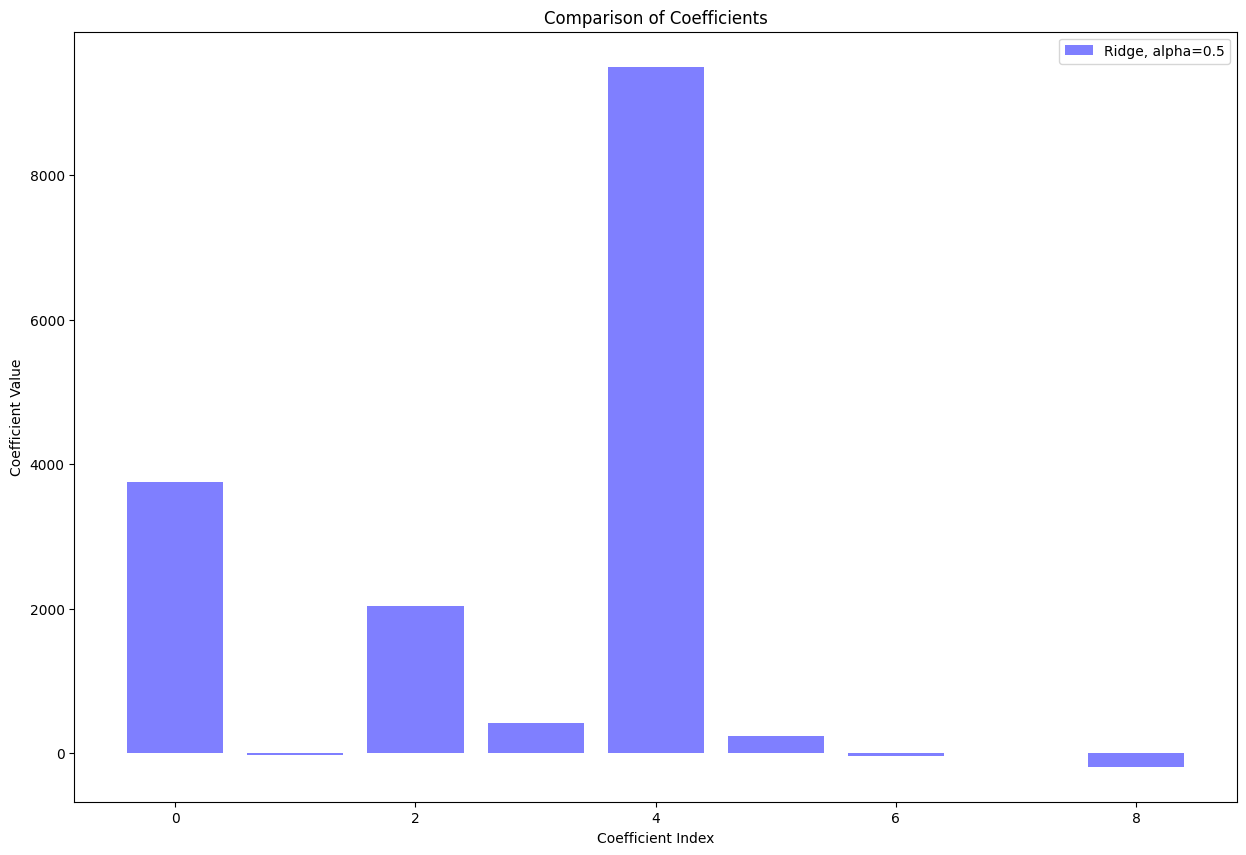

Coefficients of the variables in the sklearn:  [ 3.74902222e+03 -2.62465349e+01  2.04079840e+03  4.14983577e+02
  9.50460308e+03  2.31422007e+02 -3.75385345e+01 -2.62756588e+00
 -1.89304602e+02]


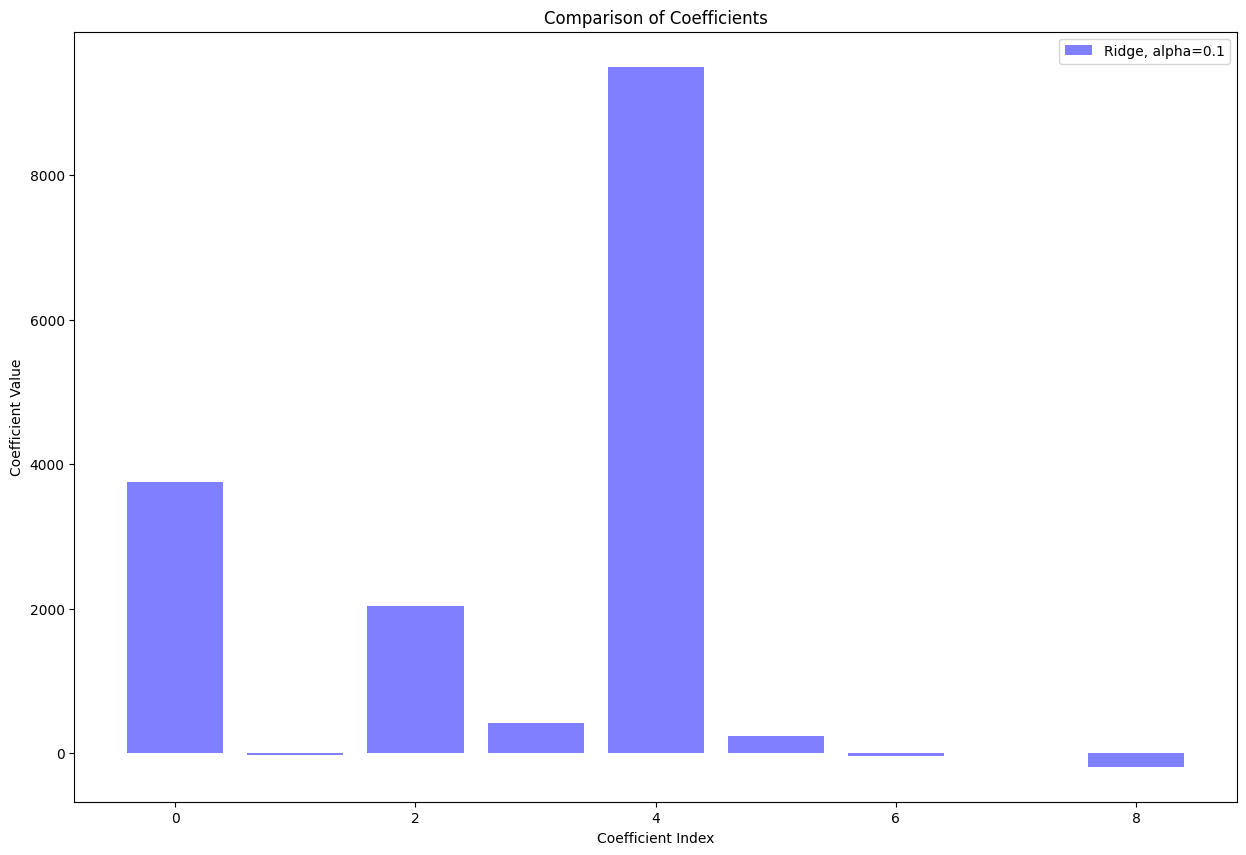

Coefficients of the variables in the sklearn:  [ 3.74246530e+03 -2.47805854e+01  2.03727368e+03  4.14816654e+02
  9.48725091e+03  2.30695660e+02 -3.86806742e+01 -8.77831529e-01
 -1.89247068e+02]


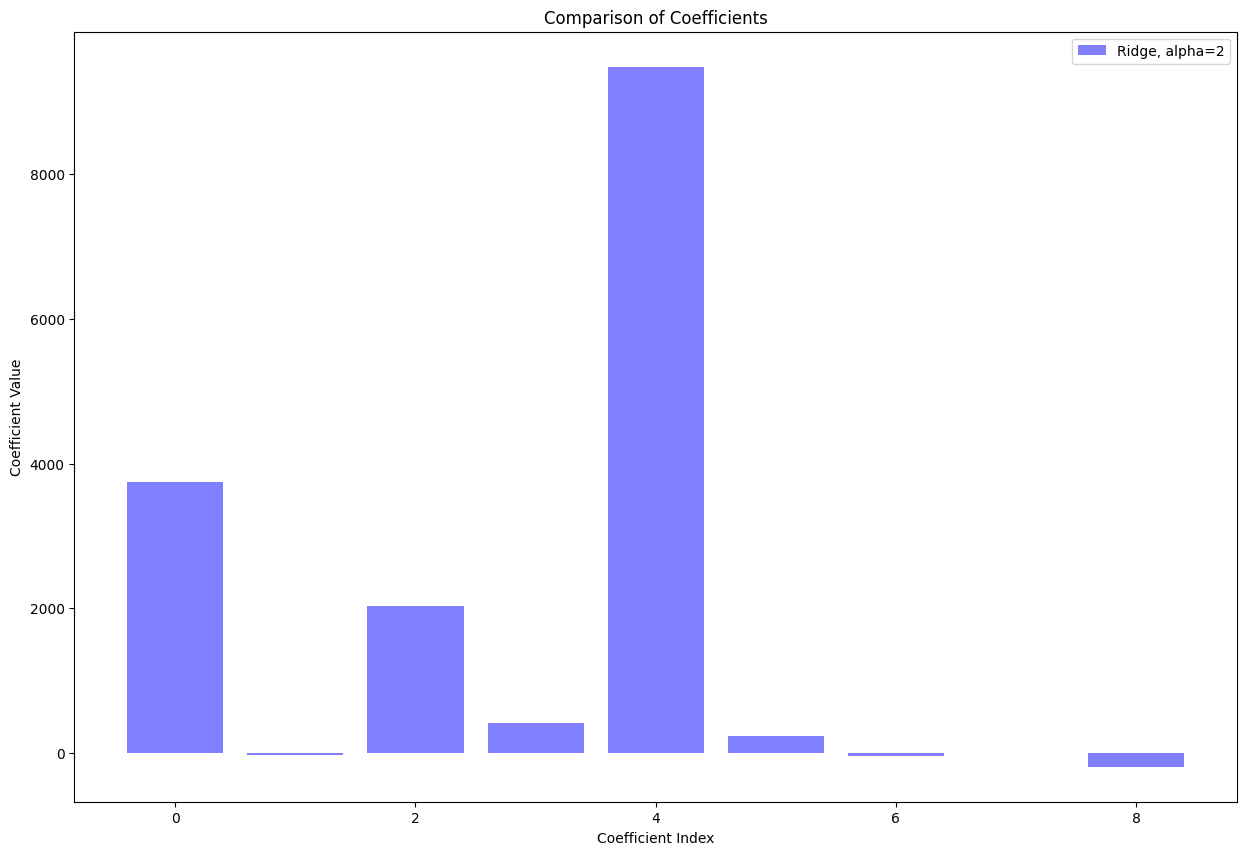

In [58]:
Ridge_lr = Ridge(alpha=0.5)
Ridge_lr.fit(x_train, y_train)


Ridge_lr_low_alpha = Ridge(alpha=0.1)
Ridge_lr_low_alpha.fit(x_train, y_train)


Ridge_lr_high_alpha = Ridge(alpha=2)
Ridge_lr_high_alpha.fit(x_train, y_train)
visualize_coef(Ridge_lr, "Ridge, alpha=0.5", "b")
visualize_coef(Ridge_lr_low_alpha, "Ridge, alpha=0.1", "b")
visualize_coef(Ridge_lr_high_alpha, "Ridge, alpha=2", "b")


In [60]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 0.42458928052715095, 1: 0.4260798492770169, 10: 0.44201534525871755, 100: 0.6000178841960497}
Cross-validated MSE for different alphas: {0.1: 0.4244255880219555, 1: 0.4244699861313177, 10: 0.4247873846372263, 100: 0.43195954784776147}
